In [169]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [170]:
#load dataset
dataset = pd.read_csv('./cannabisGrowthRaw2020.csv')
dataset.head()

,PMCno,DBH,Ht,Surv,Vig,Ins_res,Stem_Fm,Crown_Fm,Brnch_Fm,Utility
0,1642.0,20.0,11.0,43.0,4.0,3.0,4.0,4.0,4.0,good
1,1606.0,14.0,10.0,97.0,5.0,4.0,4.0,4.0,3.0,best
2,1471.0,11.0,7.0,54.0,2.0,3.0,3.0,4.0,3.0,low
3,1724.0,16.0,10.0,76.0,4.0,3.0,4.0,4.0,4.0,good
4,2255.0,16.0,12.0,97.0,4.0,3.0,4.0,3.0,3.0,good


In [171]:
#Overview of Characteristics of Dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 10 columns):
PMCno       1458 non-null float64
DBH         1470 non-null float64
Ht          1470 non-null float64
Surv        1284 non-null float64
Vig         1334 non-null float64
Ins_res     1334 non-null float64
Stem_Fm     1334 non-null float64
Crown_Fm    1334 non-null float64
Brnch_Fm    1334 non-null float64
Utility     1472 non-null object
dtypes: float64(9), object(1)
memory usage: 115.1+ KB


In [172]:
#Charateristics of Data
dataset.describe()

,PMCno,DBH,Ht,Surv,Vig,Ins_res,Stem_Fm,Crown_Fm,Brnch_Fm
count,1458.000000,1470.000000,1470.000000,1284.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000
mean,2136.977366,75.865518,9.674565,62.059579,3.159520,2.966417,3.083208,3.282159,2.905547
std,648.661372,1614.500903,4.297192,32.247227,1.041356,0.838065,0.760061,0.778459,0.811572
min,1.000000,0.580000,1.000000,1.500000,0.500000,0.000000,0.000000,0.000000,0.000000
25%,1595.000000,8.600000,6.145000,38.000000,2.500000,2.500000,3.000000,3.000000,2.500000
50%,2426.000000,15.000000,9.285000,66.000000,3.000000,3.000000,3.000000,3.300000,3.000000
75%,2656.000000,21.982500,12.300000,88.000000,4.000000,3.500000,3.700000,4.000000,3.300000
max,3537.000000,45452.000000,24.000000,108.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [173]:
#Replacing ? with 0
dataset.replace(['?'],['0'], inplace=True)
dataset

,PMCno,DBH,Ht,Surv,Vig,Ins_res,Stem_Fm,Crown_Fm,Brnch_Fm,Utility
0,1642.0,20.00,11.00,43.0,4.0,3.0,4.0,4.0,4.0,good
1,1606.0,14.00,10.00,97.0,5.0,4.0,4.0,4.0,3.0,best
2,1471.0,11.00,7.00,54.0,2.0,3.0,3.0,4.0,3.0,low
3,1724.0,16.00,10.00,76.0,4.0,3.0,4.0,4.0,4.0,good
4,2255.0,16.00,12.00,97.0,4.0,3.0,4.0,3.0,3.0,good
5,1644.0,18.00,13.00,76.0,5.0,4.0,5.0,4.0,5.0,best
6,1643.0,15.00,11.00,86.0,4.0,2.0,3.0,3.0,3.0,good
7,1645.0,21.00,12.00,108.0,5.0,5.0,4.0,4.0,2.0,best
8,1646.0,8.00,7.00,86.0,3.0,3.0,4.0,4.0,4.0,average
9,1647.0,16.00,10.00,54.0,4.0,4.0,4.0,3.0,3.0,good


In [174]:
#Coverting columns to float using  .astype()
dataset['PMCno'] = dataset.PMCno.astype(float)
dataset['DBH'] = dataset.DBH.astype(float)
dataset['Ht'] = dataset.Ht.astype(float)
dataset['Surv'] = dataset.Surv.astype(float)
dataset['Vig'] = dataset.Vig.astype(float)
dataset['Ins_res'] = dataset.Ins_res.astype(float)
dataset['Stem_Fm'] = dataset.Stem_Fm.astype(float)
dataset['Crown_Fm'] = dataset.Crown_Fm.astype(float)
dataset['Brnch_Fm'] = dataset.Brnch_Fm.astype(float)

In [175]:
#Count and percent of missing data 
total = dataset.isnull().sum().sort_values(ascending=False)
percent = (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Surv,188,0.127717
Brnch_Fm,138,0.093750
Crown_Fm,138,0.093750
Stem_Fm,138,0.093750
Ins_res,138,0.093750
Vig,138,0.093750
PMCno,14,0.009511
Ht,2,0.001359
DBH,2,0.001359
Utility,0,0.000000


In [176]:
#Combine Classes
dataset.Utility = [x if x == 'best' else 'other' for x in dataset.Utility]


In [177]:
dataset.Utility[dataset.Utility == 'best'] = 1
dataset.Utility[dataset.Utility =='other'] = 0

dataset['Utility'] = dataset.Utility.astype(int)

dataset.head()

C:\Users\Prachi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Prachi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,PMCno,DBH,Ht,Surv,Vig,Ins_res,Stem_Fm,Crown_Fm,Brnch_Fm,Utility
0,1642.0,20.0,11.0,43.0,4.0,3.0,4.0,4.0,4.0,0
1,1606.0,14.0,10.0,97.0,5.0,4.0,4.0,4.0,3.0,1
2,1471.0,11.0,7.0,54.0,2.0,3.0,3.0,4.0,3.0,0
3,1724.0,16.0,10.0,76.0,4.0,3.0,4.0,4.0,4.0,0
4,2255.0,16.0,12.0,97.0,4.0,3.0,4.0,3.0,3.0,0


In [178]:
#Replacing NaN values from PMCno, DBH and Surv with median value
NaN_replace=['PMCno','DBH','Surv','Ht']
for column in NaN_replace:
    median = dataset[column].median(skipna=True)
    dataset[column] = dataset[column].replace(np.NaN, median)

In [179]:
#Looking for rows with more than 50% attributes having NaN values
#Reserving it for validation set
dataset[pd.isnull(dataset).any(axis=1)]
dataset[dataset.Vig.isnull()  & dataset.Surv.isnull() & dataset.Ins_res.isnull()  & dataset.Stem_Fm.isnull()  & dataset.Crown_Fm.isnull()  & dataset.Brnch_Fm.isnull()]

dataset1 = dataset


In [187]:
#Dropping rows with more than 50% attribute value missing
dataset1.dropna(subset=['Vig','Ins_res','Stem_Fm','Crown_Fm','Brnch_Fm'], how='all', inplace=True)
dataset1

,PMCno,DBH,Ht,Surv,Vig,Ins_res,Stem_Fm,Crown_Fm,Brnch_Fm,Utility
0,1642.0,20.00,11.00,43.0,4.0,3.0,4.0,4.0,4.0,0
1,1606.0,14.00,10.00,97.0,5.0,4.0,4.0,4.0,3.0,1
2,1471.0,11.00,7.00,54.0,2.0,3.0,3.0,4.0,3.0,0
3,1724.0,16.00,10.00,76.0,4.0,3.0,4.0,4.0,4.0,0
4,2255.0,16.00,12.00,97.0,4.0,3.0,4.0,3.0,3.0,0
5,1644.0,18.00,13.00,76.0,5.0,4.0,5.0,4.0,5.0,1
6,1643.0,15.00,11.00,86.0,4.0,2.0,3.0,3.0,3.0,0
7,1645.0,21.00,12.00,108.0,5.0,5.0,4.0,4.0,2.0,1
8,1646.0,8.00,7.00,86.0,3.0,3.0,4.0,4.0,4.0,0
9,1647.0,16.00,10.00,54.0,4.0,4.0,4.0,3.0,3.0,0


In [188]:
#Print dataset
dataset1

,PMCno,DBH,Ht,Surv,Vig,Ins_res,Stem_Fm,Crown_Fm,Brnch_Fm,Utility
0,1642.0,20.00,11.00,43.0,4.0,3.0,4.0,4.0,4.0,0
1,1606.0,14.00,10.00,97.0,5.0,4.0,4.0,4.0,3.0,1
2,1471.0,11.00,7.00,54.0,2.0,3.0,3.0,4.0,3.0,0
3,1724.0,16.00,10.00,76.0,4.0,3.0,4.0,4.0,4.0,0
4,2255.0,16.00,12.00,97.0,4.0,3.0,4.0,3.0,3.0,0
5,1644.0,18.00,13.00,76.0,5.0,4.0,5.0,4.0,5.0,1
6,1643.0,15.00,11.00,86.0,4.0,2.0,3.0,3.0,3.0,0
7,1645.0,21.00,12.00,108.0,5.0,5.0,4.0,4.0,2.0,1
8,1646.0,8.00,7.00,86.0,3.0,3.0,4.0,4.0,4.0,0
9,1647.0,16.00,10.00,54.0,4.0,4.0,4.0,3.0,3.0,0


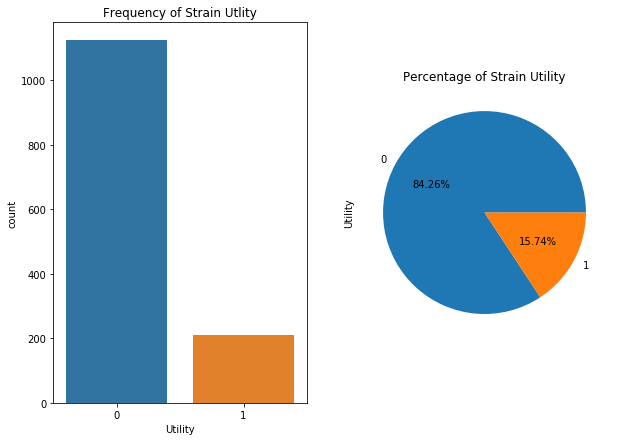

In [190]:
#Visualizing distribution of data
# 0 - Other
# 1 -Best
fig, axs = plt.subplots(1,2,figsize=(10,7))
sns.countplot(x='Utility',data=dataset1, ax=axs[0])
axs[0].set_title("Frequency of Strain Utlity")
dataset1.Utility.value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')
axs[1].set_title("Percentage of Strain Utility")
plt.show()

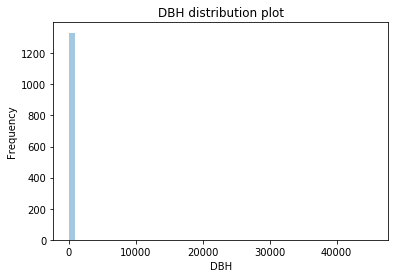

In [168]:
#Histogram plot for DBH
sns.distplot(dataset1['DBH'],kde = False)
plt.title('DBH distribution plot')
plt.xlabel('DBH')
plt.ylabel('Frequency')
plt.show()

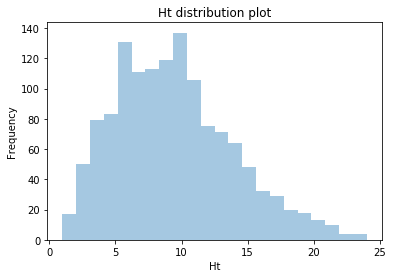

In [58]:
#Histogram plot for Ht
sns.distplot(dataset1['Ht'],kde = False)
plt.title('Ht distribution plot')
plt.xlabel('Ht')
plt.ylabel('Frequency')
plt.show()

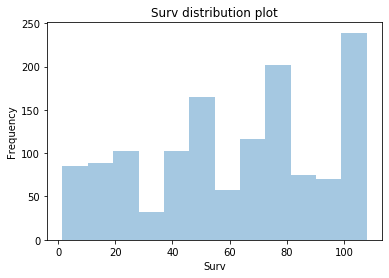

In [59]:
#Histogram plot for Surv
sns.distplot(dataset1['Surv'],kde = False)
plt.title('Surv distribution plot')
plt.xlabel('Surv')
plt.ylabel('Frequency')
plt.show()

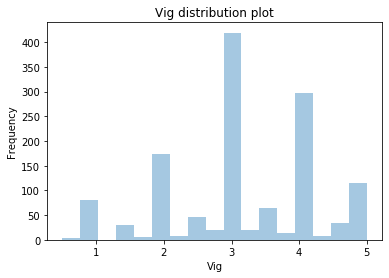

In [60]:
#Histogram plot for Vig
sns.distplot(dataset1['Vig'],kde = False)
plt.title('Vig distribution plot')
plt.xlabel('Vig')
plt.ylabel('Frequency')
plt.show()

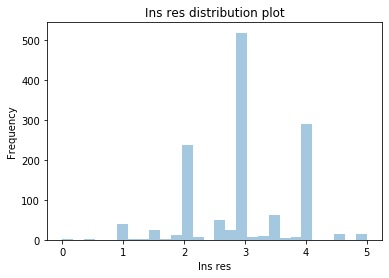

In [61]:
#Histogram plot for Ins_res
sns.distplot(dataset1['Ins_res'],kde = False)
plt.title('Ins res distribution plot')
plt.xlabel('Ins res')
plt.ylabel('Frequency')
plt.show()

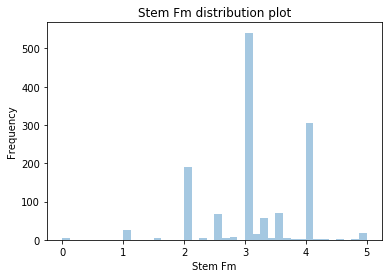

In [62]:
#Histogram plot for Stem_Fm
sns.distplot(dataset1['Stem_Fm'],kde = False)
plt.title('Stem Fm distribution plot')
plt.xlabel('Stem Fm')
plt.ylabel('Frequency')
plt.show()

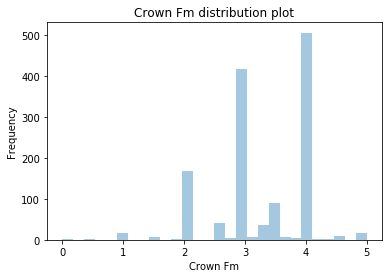

In [63]:
#Histogram plot for Crown_Fm
sns.distplot(dataset1['Crown_Fm'],kde = False)
plt.title('Crown Fm distribution plot')
plt.xlabel('Crown Fm')
plt.ylabel('Frequency')
plt.show()

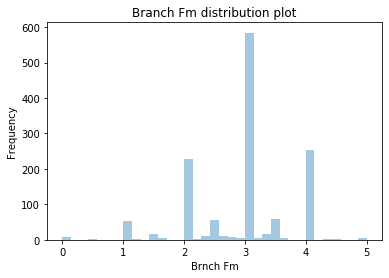

In [64]:
#Histogram plot for Brnch_Fm
sns.distplot(dataset1['Brnch_Fm'],kde = False)
plt.title('Branch Fm distribution plot')
plt.xlabel('Brnch Fm')
plt.ylabel('Frequency')
plt.show()

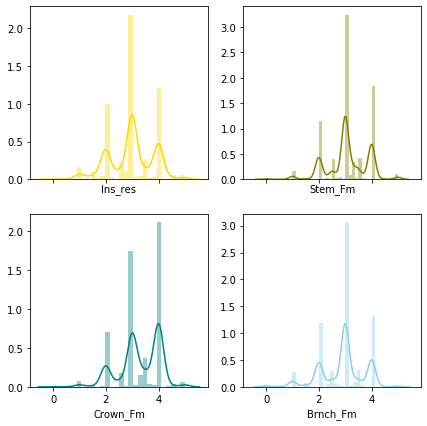

In [65]:
#Visualisation
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.distplot( dataset1["Brnch_Fm"] , color="skyblue", ax=axes[1, 1],axlabel="Brnch_Fm")
sns.distplot( dataset1["Stem_Fm"] , color="olive", ax=axes[0, 1],axlabel="Stem_Fm")
sns.distplot( dataset1["Ins_res"] , color="gold", ax=axes[0, 0],axlabel="Ins_res")
sns.distplot( dataset1["Crown_Fm"] , color="teal", ax=axes[1, 0],axlabel="Crown_Fm")
plt.show()

C:\Users\Prachi\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Unrecognized location 'Upper left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


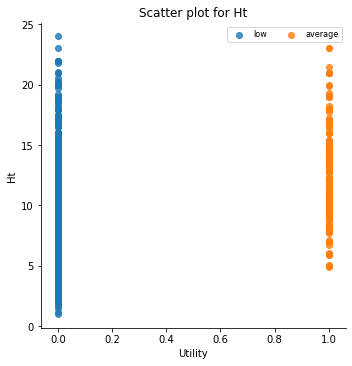

In [66]:
#Scatterplot for Utility and Ht
sns.lmplot( x="Utility", y="Ht", data=dataset1, fit_reg=False, hue='Utility', legend=False)
plt.legend(
           ('low','average','good','best','none'),
           scatterpoints=1,
           loc='Upper left',
           ncol=3,
           fontsize=8)
plt.title('Scatter plot for Ht')
plt.show()

C:\Users\Prachi\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Unrecognized location 'Upper left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


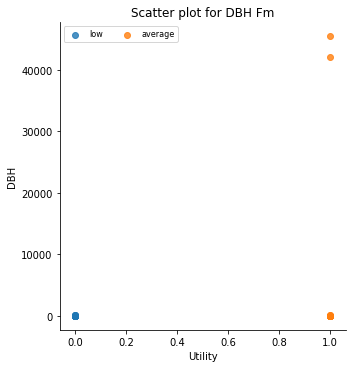

In [67]:
#Scatterplot for Utility and DBH
sns.lmplot( x="Utility", y="DBH", data=dataset1, fit_reg=False, hue='Utility', legend=False)
plt.legend(
           ('low','average','good','best','none'),
           scatterpoints=1,
           loc='Upper left',
           ncol=3,
           fontsize=8)
plt.title('Scatter plot for DBH Fm')
plt.show()

C:\Users\Prachi\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Unrecognized location 'Upper left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


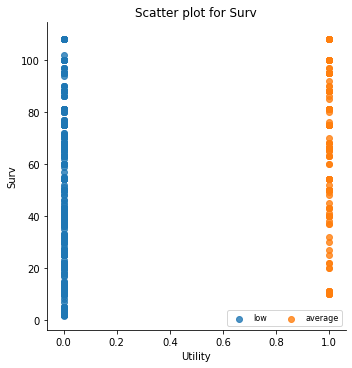

In [68]:
#Scatterplot for Utility and Surv
sns.lmplot( x="Utility", y="Surv", data=dataset1, fit_reg=False, hue='Utility', legend=False)
plt.legend(
           ('low','average','good','best','none'),
           scatterpoints=1,
           loc='Upper left',
           ncol=3,
           fontsize=8)
plt.title('Scatter plot for Surv')
plt.show()

C:\Users\Prachi\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Unrecognized location 'Upper left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


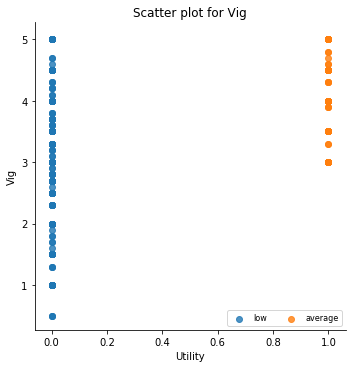

In [69]:
#Scatterplot for Utility and Vig
sns.lmplot( x="Utility", y="Vig", data=dataset1, fit_reg=False, hue='Utility', legend=False)
plt.legend(
           ('low','average','good','best','none'),
           scatterpoints=1,
           loc='Upper left',
           ncol=3,
           fontsize=8)
plt.title('Scatter plot for Vig')
plt.show()

C:\Users\Prachi\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Unrecognized location 'Upper left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


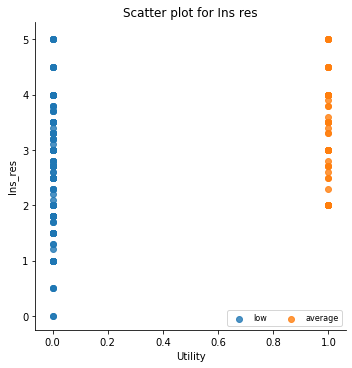

In [70]:
#Scatterplot for Utility and Ins_res
sns.lmplot( x="Utility", y="Ins_res", data=dataset1, fit_reg=False, hue='Utility', legend=False)
plt.legend(
           ('low','average','good','best','none'),
           scatterpoints=1,
           loc='Upper left',
           ncol=3,
           fontsize=8)
plt.title('Scatter plot for Ins res')
plt.show()

C:\Users\Prachi\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Unrecognized location 'Upper left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


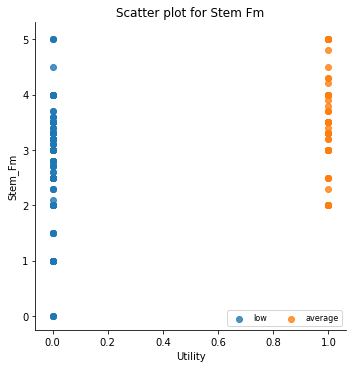

In [71]:
#Scatterplot for Utility and Stem_Fm
sns.lmplot( x="Utility", y="Stem_Fm", data=dataset1, fit_reg=False, hue='Utility', legend=False)
plt.legend(
           ('low','average','good','best','none'),
           scatterpoints=1,
           loc='Upper left',
           ncol=3,
           fontsize=8)
plt.title('Scatter plot for Stem Fm')
plt.show()

C:\Users\Prachi\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Unrecognized location 'Upper left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


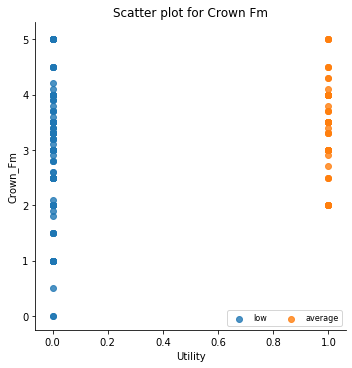

In [72]:
#Scatterplot for Utility and Crown_Fm
sns.lmplot( x="Utility", y="Crown_Fm", data=dataset1, fit_reg=False, hue='Utility', legend=False)
plt.legend(
           ('low','average','good','best','none'),
           scatterpoints=1,
           loc='Upper left',
           ncol=3,
           fontsize=8)
plt.title('Scatter plot for Crown Fm')
plt.show()

C:\Users\Prachi\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Unrecognized location 'Upper left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


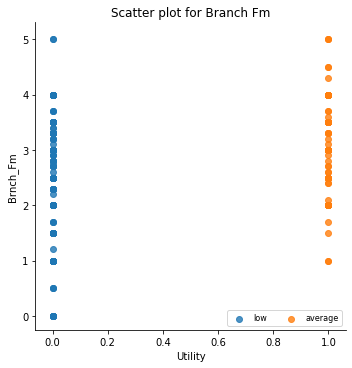

In [73]:
#Scatterplot for Utility and Brnch_Fm
sns.lmplot( x="Utility", y="Brnch_Fm", data=dataset1, fit_reg=False, hue='Utility', legend=False)
plt.legend(
           ('low','average','good','best','none'),
           scatterpoints=1,
           loc='Upper left',
           ncol=3,
           fontsize=8)
plt.title('Scatter plot for Branch Fm')
plt.show()

C:\Users\Prachi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Prachi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


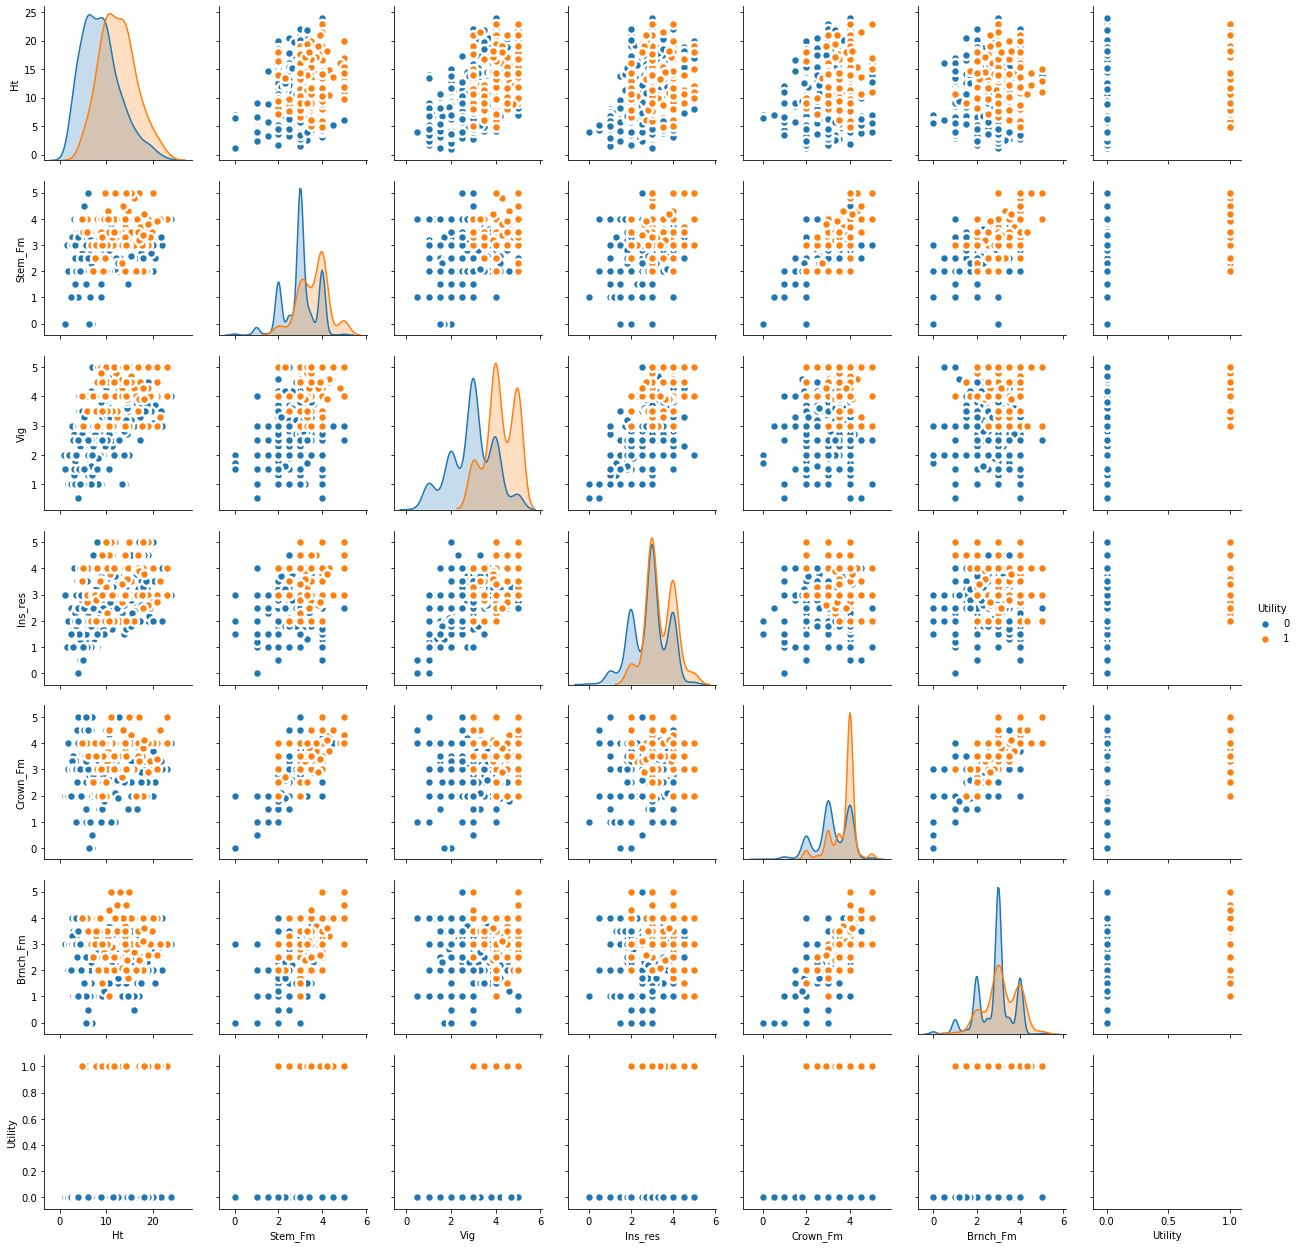

In [74]:
#Scatterplot Graph
dataframe = pd.DataFrame(dataset1,columns=['Ht','Stem_Fm', 'Vig','Ins_res','Crown_Fm','Brnch_Fm','Utility'])

sns.pairplot(dataframe, kind="scatter", hue="Utility", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

C:\Users\Prachi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


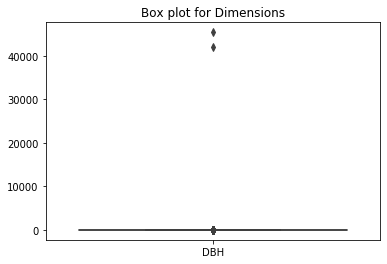

In [75]:
#Boxplot
sns.boxplot(data=dataset1.ix[:,1:2])
plt.title('Box plot for Dimensions')
plt.show()

C:\Users\Prachi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


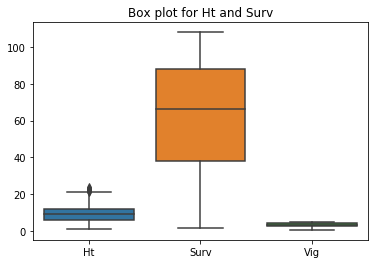

In [76]:
#Boxplot for Features - Ht, Surv and Vig
sns.boxplot(data=dataset1.ix[:,2:5])
plt.title('Box plot for Ht and Surv')
plt.show()


C:\Users\Prachi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


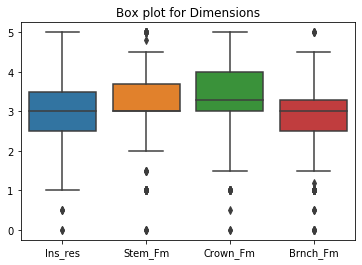

In [77]:
#Boxplot for Dimensions - Ins_res, Stem_Fm, Crown_Fm and Brnch_Fm
sns.boxplot(data=dataset1.ix[:,5:9])
plt.title('Box plot for Dimensions')
plt.show()

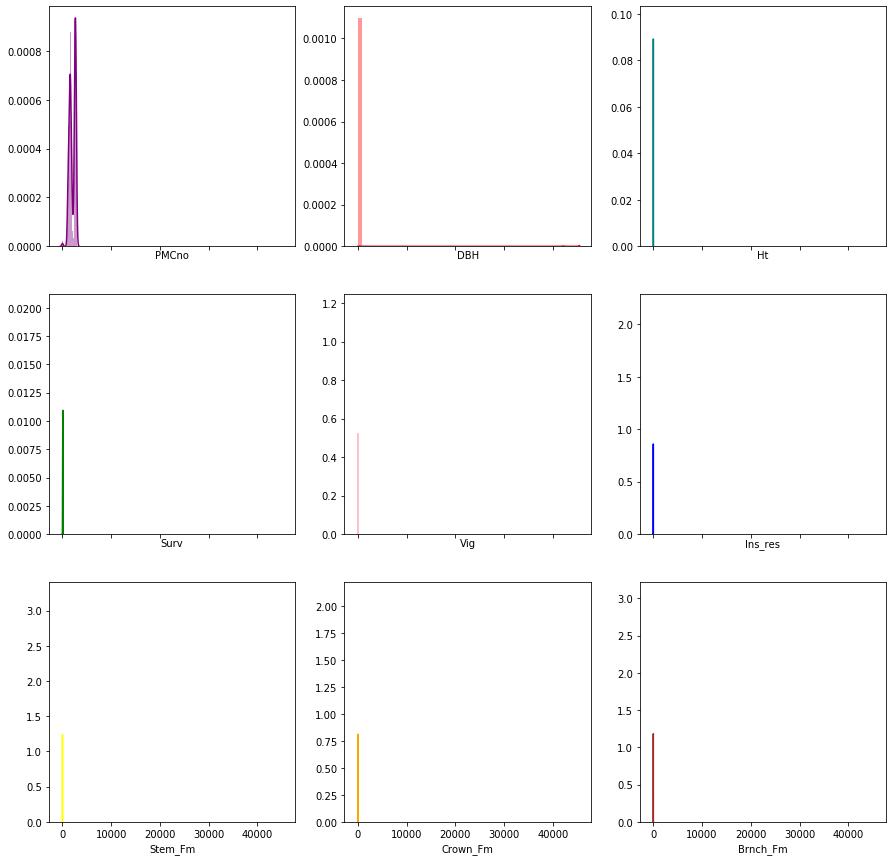

In [78]:
#Distribution
f, axes = plt.subplots(3,3, figsize=(15,15),sharex=True)
f.canvas.set_window_title('Distributions')
sns.distplot(dataset1['PMCno'],color="purple",ax=axes[0,0])
sns.distplot(dataset1['DBH'],color="red",ax=axes[0,1])
sns.distplot(dataset1['Ht'],color="teal",ax=axes[0,2])
sns.distplot(dataset1['Surv'],color="green",ax=axes[1,0])
sns.distplot(dataset1['Vig'],color="pink",ax=axes[1,1])
sns.distplot(dataset1['Ins_res'],color="blue",ax=axes[1,2])
sns.distplot(dataset1['Stem_Fm'],color="yellow",ax=axes[2,0])
sns.distplot(dataset1['Crown_Fm'],color="orange",ax=axes[2,1])
sns.distplot(dataset1['Brnch_Fm'],color="brown",ax=axes[2,2])

In [79]:
#Identify Correlated Columns
def correlation(dataset1,threshold):
    col_corr=set() # set will contains unique values.
    corr_matrix=dataset1.corr() #finding the correlation between columns.
    for i in range(len(corr_matrix.columns)): #number of columns
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold: #checking correlation between columns.
                colName=corr_matrix.columns[i] #getting the column name
                col_corr.add(colName) #adding the correlated column name
    return col_corr #returning set of column names
col=correlation(dataset1.drop('Utility',axis=1),0.8)
print('Correlated columns:',col)

Correlated columns: set()


In [80]:
dataset1.corr()

,PMCno,DBH,Ht,Surv,Vig,Ins_res,Stem_Fm,Crown_Fm,Brnch_Fm,Utility
PMCno,1.000000,-0.025001,0.202645,-0.085923,0.116547,0.145484,0.138679,0.158674,0.123538,0.045449
DBH,-0.025001,1.000000,0.075962,-0.026138,0.032779,0.047895,0.001601,0.019280,-0.010435,0.091145
Ht,0.202645,0.075962,1.000000,-0.111581,0.588071,0.379491,0.325315,0.192063,-0.035050,0.305731
Surv,-0.085923,-0.026138,-0.111581,1.000000,0.208310,-0.142252,0.047763,0.044428,0.111095,0.149684
Vig,0.116547,0.032779,0.588071,0.208310,1.000000,0.515951,0.353698,0.172327,-0.042581,0.436983
Ins_res,0.145484,0.047895,0.379491,-0.142252,0.515951,1.000000,0.264880,0.228726,0.050526,0.217813
Stem_Fm,0.138679,0.001601,0.325315,0.047763,0.353698,0.264880,1.000000,0.711281,0.562083,0.304572
Crown_Fm,0.158674,0.019280,0.192063,0.044428,0.172327,0.228726,0.711281,1.000000,0.678071,0.252726
Brnch_Fm,0.123538,-0.010435,-0.035050,0.111095,-0.042581,0.050526,0.562083,0.678071,1.000000,0.142168
Utility,0.045449,0.091145,0.305731,0.149684,0.436983,0.217813,0.304572,0.252726,0.142168,1.000000


In [81]:
#Correlation graph
corr=dataset1.corr()
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '120px', 'font-size': '12pt'})\
    .set_precision(2)\

,PMCno,DBH,Ht,Surv,Vig,Ins_res,Stem_Fm,Crown_Fm,Brnch_Fm,Utility
PMCno,1,-0.025,0.2,-0.086,0.12,0.15,0.14,0.16,0.12,0.045
DBH,-0.025,1,0.076,-0.026,0.033,0.048,0.0016,0.019,-0.01,0.091
Ht,0.2,0.076,1,-0.11,0.59,0.38,0.33,0.19,-0.035,0.31
Surv,-0.086,-0.026,-0.11,1,0.21,-0.14,0.048,0.044,0.11,0.15
Vig,0.12,0.033,0.59,0.21,1,0.52,0.35,0.17,-0.043,0.44
Ins_res,0.15,0.048,0.38,-0.14,0.52,1,0.26,0.23,0.051,0.22
Stem_Fm,0.14,0.0016,0.33,0.048,0.35,0.26,1,0.71,0.56,0.3
Crown_Fm,0.16,0.019,0.19,0.044,0.17,0.23,0.71,1,0.68,0.25
Brnch_Fm,0.12,-0.01,-0.035,0.11,-0.043,0.051,0.56,0.68,1,0.14
Utility,0.045,0.091,0.31,0.15,0.44,0.22,0.3,0.25,0.14,1


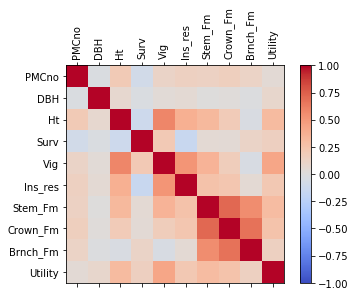

In [82]:
#Heat Map for Features and Dimensions
corr = dataset1.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(dataset.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(dataset.columns)
ax.set_yticklabels(dataset.columns)
plt.show()


In [191]:
#Reindexing
dataset2 = dataset1.reset_index(drop=True)

In [192]:
#Tukey Method

# import required libraries
from collections import Counter

# Outlier detection 
def detect_outliers(df,n,features):
    
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

# List of Outliers
Outliers_to_drop = detect_outliers(dataset2.drop('Utility',axis=1),0,list(dataset2.drop('Utility',axis=1)))
dataset2.loc[Outliers_to_drop]

,PMCno,DBH,Ht,Surv,Vig,Ins_res,Stem_Fm,Crown_Fm,Brnch_Fm,Utility
41,1644.0,43.000,15.00,66.0,5.0,4.0,4.0,3.0,2.0,1
52,1645.0,43.000,11.00,66.0,4.0,5.0,3.0,3.0,1.0,1
70,1606.0,41.000,14.00,11.0,5.0,4.0,2.0,2.0,1.0,0
287,2620.0,58.000,5.00,108.0,3.0,4.0,3.0,3.0,3.0,0
333,2752.0,44.000,18.00,54.0,4.0,3.0,2.0,2.0,2.0,0
371,2752.0,45.000,16.00,27.0,3.0,3.0,2.0,2.0,1.0,0
375,2773.0,52.000,20.00,14.0,4.0,3.0,2.0,2.0,2.0,0
574,1719.0,47.000,19.00,22.0,5.0,5.0,4.0,4.0,3.0,1
579,1601.0,41.000,18.00,11.0,4.0,4.0,4.0,4.0,4.0,1
581,2751.0,40.000,19.00,43.0,5.0,3.0,4.0,3.0,2.0,0


In [193]:
#Create New Dataset without Outliers
good_data = dataset2.drop(dataset2.index[Outliers_to_drop]).reset_index(drop = True)
good_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 10 columns):
PMCno       1176 non-null float64
DBH         1176 non-null float64
Ht          1176 non-null float64
Surv        1176 non-null float64
Vig         1176 non-null float64
Ins_res     1176 non-null float64
Stem_Fm     1176 non-null float64
Crown_Fm    1176 non-null float64
Brnch_Fm    1176 non-null float64
Utility     1176 non-null int32
dtypes: float64(9), int32(1)
memory usage: 87.4 KB
